# rasterize continents
Create raster layer of continents compatible with ERA5 grid

In [11]:
import subprocess
import xarray as xr
import numpy as np
import os
cd = os.getcwd()
cd

'/Users/mweynants/BGI/DeepExtremes/era5-continents/pyCode'

In [12]:
if not os.path.exists('../data/'):
   os.makedirs('../data/')

# download *World_Continents* from https://hub.arcgis.com/datasets/esri::world-continents/about in data


In [76]:
# rasterize with GDAL to GeoTiff
if not os.path.exists('../output/'):
   os.makedirs('../output/')

# overwrite
if os.path.exists('../output/World_Continents_raster_0d25_180.tif'):
   os.remove('../output/World_Continents_raster_0d25_180.tif')

# -at Enables the ALL_TOUCHED rasterization option so that all pixels touched by lines or polygons will be 
# updated, not just those on the line render path, or whose center point is within the polygon. 
# Defaults to disabled for normal rendering rules.
# -ts 1440 721 -te -180.25 -90.125 180.25 90.125 -tr 0.25 0.25 -ts 1440 721 -tap 
os.system('gdal_rasterize -l World_Continents -at -a FID -tr 0.25 0.25 -te -180.125 -90.125 179.875 90.125 -a_nodata 0.0 -a_srs EPSG:4326 -ot Byte /vsizip/../data/World_Continents.zip/World_Continents.shp ../output/World_Continents_raster_0d25_180.tif')


0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [97]:
# check result
dst = xr.open_dataset("../output/World_Continents_raster_0d25_180.tif")
dst


<xarray.Dataset>
Dimensions:      (band: 1, x: 1439, y: 721)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -179.9 -179.6 -179.4 -179.1 ... 179.1 179.4 179.6
  * y            (y) float64 90.12 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [98]:

# xarray says 1439 x, but gdalinfo says 1440
os.system('gdalinfo ../output/World_Continents_raster_0d25_180.tif')

Driver: GTiff/GeoTIFF
Files: ../output/World_Continents_raster_0d25_180.tif
       ../output/World_Continents_raster_0d25_180.tif.aux.xml
Size is 1440, 721
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["Horizontal component of 3D system."],
        AREA["World."],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-180.125000000000000,90.125000000000000)
Pixel Size = (0.250000000000000,-0.250000000000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
 

0

In [92]:
# rasterize with GDAL to NETCDF
if not os.path.exists('../output/'):
   os.makedirs('../output/')

# overwrite
if os.path.exists('../output/World_Continents_raster_0d25_180.nc'):
   os.remove('../output/World_Continents_raster_0d25_180.nc')


# -at Enables the ALL_TOUCHED rasterization option so that all pixels touched by lines or polygons will be 
# updated, not just those on the line render path, or whose center point is within the polygon. 
# Defaults to disabled for normal rendering rules.
# -ts 1440 721 -te -180.25 -90.125 180.25 90.125 -tr 0.25 0.25 -ts 1440 721 -tap 
os.system('gdal_rasterize -l World_Continents -at -a FID -tr 0.25 0.25 -te -180.125 -90.125 179.875 90.125 -a_nodata 0.0 -ot Byte /vsizip/../data/World_Continents.zip/World_Continents.shp ../output/World_Continents_raster_0d25_180.nc')


0...10...20...30...40...50...60...70...80...90...100 - done.


Warning 1: Several drivers matching nc extension. Using NETCDF


0

In [93]:
ds = xr.open_dataset("../output/World_Continents_raster_0d25_180.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    Band1    (lat, lon) float32 ...
    crs      |S1 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.0.2, released 2019/10/28
    history:      Mon Aug 07 15:55:11 2023: GDAL Create( ../output/World_Cont...

In [94]:
os.system('gdalinfo ../output/World_Continents_raster_0d25_180.nc')

Driver: netCDF/Network Common Data Format
Files: ../output/World_Continents_raster_0d25_180.nc
       ../output/World_Continents_raster_0d25_180.nc.aux.xml
Size is 1440, 721
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-180.125000000000000,90.125000000000000)
Pixel Size = (0.250000000000000,-0.250000000000000)
Metadata:
  Band1#grid_mapping=crs
  Band1#long_name=GDAL Band Number 1
  Band1#_FillValue=0
  crs#GeoTransform=-180.125 0.25 0 90.125 0 -0.25 
  crs#grid_mappi

0

In [7]:
if not os.path.exists('../data/land_sea_mask.nc'):
    import cdsapi
    c = cdsapi.Client()
    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': 'land_sea_mask',
            'year': '2023',
            'month': '01',
            'day': '01',
            'time': '00:00',
        },
        '../data/land_sea_mask.nc')

lsm = xr.open_dataset('../data/land_sea_mask.nc')
lsm

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2023-01-01
Data variables:
    lsm        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-07 12:55:07 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [95]:
os.system('gdalinfo ../data/land_sea_mask.nc')

Driver: netCDF/Network Common Data Format
Files: ../data/land_sea_mask.nc
       ../data/land_sea_mask.nc.aux.xml
Size is 1440, 721
Origin = (-0.125000000000000,90.125000000000000)
Pixel Size = (0.250000000000000,-0.250000000000000)
Metadata:
  latitude#long_name=latitude
  latitude#units=degrees_north
  longitude#long_name=longitude
  longitude#units=degrees_east
  lsm#add_offset=0.4999923702562068
  lsm#long_name=Land-sea mask
  lsm#missing_value=-32767
  lsm#scale_factor=1.525948758640685e-05
  lsm#standard_name=land_binary_mask
  lsm#units=(0 - 1)
  lsm#_FillValue=-32767
  NC_GLOBAL#Conventions=CF-1.6
  NC_GLOBAL#history=2023-08-07 12:55:07 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data7/adaptor.mars.internal-1691412907.024128-32611-5-7871e040-870a-43d8-acd1-3abde07a9130.nc /cache/tmp/7871e040-870a-43d8-acd1-3abde07a9130-adaptor.mars.internal-1691412904.9229696-32611-10-tmp.grib
  NETCDF_DIM_EXTRA={time}
  NETCDF_DIM_time_DEF={1,

0

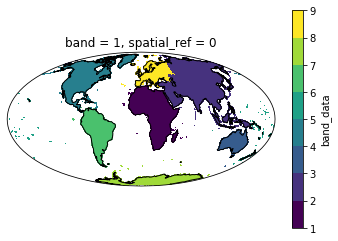

In [88]:
import matplotlib as mpl
import cartopy.crs as ccrs

map_proj = ccrs.Mollweide(central_longitude=0)

p = dst.band_data.isel(band=0).plot(
    levels = list(range(1,10)),
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    )
p.axes.coastlines()

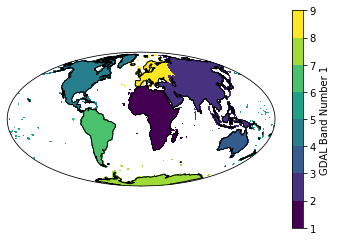

In [87]:

map_proj = ccrs.Mollweide(central_longitude=0)

p = ds.Band1.plot(
    levels = list(range(1,10)),
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    )
p.axes.coastlines()

In [90]:
# roll longitude
dsr = dst.roll(x = 180*4, roll_coords=True)
dsrc = dsr.assign_coords(x = (((dsr.x - 180) % 360) + 180) % 360)
dsrc

<xarray.Dataset>
Dimensions:      (band: 1, x: 1439, y: 721)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 359.9 0.125 0.375 0.625 ... 358.9 359.1 359.4 359.6
  * y            (y) float64 90.12 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
    spatial_ref  int64 0
Data variables:
    band_data    (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan

In [99]:
dsr = ds.roll(lon = 180*4, roll_coords=True)
dsrc = dsr.assign_coords(lon = (((dsr.lon - 180) % 360) + 180) % 360)
dsrc.to_netcdf('../output/World_Continents_raster_0d25_360.nc')
dsrc

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    Band1    (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    crs      |S1 b''
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.0.2, released 2019/10/28
    history:      Mon Aug 07 15:55:11 2023: GDAL Create( ../output/World_Cont...

In [100]:
os.system('gdalinfo ../output/World_Continents_raster_0d25_360.nc')

Driver: netCDF/Network Common Data Format
Files: ../output/World_Continents_raster_0d25_360.nc
Size is 1440, 720
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (0.000000000000000,90.000000000000000)
Pixel Size = (0.250000000000000,-0.250000000000000)
Metadata:
  Band1#grid_mapping=crs
  Band1#long_name=GDAL Band Number 1
  Band1#valid_range={0,255}
  Band1#_FillValue=0
  Band1#_Unsigned=true
  crs#GeoTransform=-180 0.25 0 90 0 -0.25 
  crs#grid_mapping_name=latitude_long

Warning 1: dimension #1 (lon) is not a Longitude/X dimension.


0